# Perceptron
> Implement (using numpy and pytorch) and demonstrate the workings of the perceptron learning algorithm

In [2]:
# Import libraries
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline


## Perceptron Formula
## $$ {\hat{y}} = \sigma(x^Tw + b)$$

### <font color='green'>Special Cases</font>

> * in perceptron:
>   * activation function = threshold function
> * in linear regression:
>	* activation function = net input = output

### $$\sigma(\sum_{i=0}^{m} {x_i}*{w_i}) = \sigma(x^Tw) = {\hat{y}}$$

* $ {\hat{y}} = output $
* $ w = weights $
* $ x = inputs $
* $ b = bias \space unit $
* $ m = no. \space of \space input \space samples $
* $ i = i^{th} \space training \space sample \space from \space a \space pool \space of \space m $

* $ z = net \space input $
* $ \alpha $ (activation function) $ = \sigma(z)$

Note:
* `bias` unit included as $ w_0 $


# Preparing toy dataset

In [9]:
m = 100 # number of samples
X = np.random.randn(m, 1)   # shape/dimensions => (100, 1)
y = np.random.randint(low=0, high=2, size=m)    # generates random numbers i.e. 0 or 1
y = y.astype(int)

print('Class label counts:', np.bincount(y))

Class label counts: [57 43]


# Shuffling and train/test split
#### <font color='red'>Why is data shuffled before training?</font>
* Avoid bias in learning:
	* If the data is ordered in a particular way, such as all examples of one class followed by all examples of another class, the model might learn patterns that are not generalizable. Shuffling ensures that the model sees a diverse set of example in each mini-batch or epoch, preventing it from learning spurious patterns based on the order of teh data.
* Improving Convergence:
	* Shuffling can help the model converge more quickly  and reliably during training. When the data is shuffled, the stochastic gradient descent (SGD) algorithm, which updates the model's parameters (weights), benefits from a more varied and representative samples of the data in each update step. This can lead to a more stable and efficient optimization process.
* Reducing Overfitting:
	* <font color='red'>What is overfitting?</font>
	    * Overfitting means when a machine learning model learns the training data too well, including all the little details and noise that don't actually help it make good predictions on new data. It's like memorizing answers for a test instead of understanding the material—when the questions change, you might not do well. This means the model works great on the data it was trained on but struggles with new, unseen data.
	* By processing the model with a more randomized view of the data, shuffling can help reduce overfitting. The model is less likely to memorize the order of the training data and more likely to learn general patterns that apply to unseen data.



In [12]:
shuffle_idx = np.arange(y.shape[0]) # create indexes from 0 to 99
# `123` is the seed value, by setting the seed,
# we ensure that the sequence of random numbers generated is the same every time the code is executed
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)    # modify the sequence in-place by shuffling the indices.

X, y = X[shuffle_idx], y[shuffle_idx]   # X and y is shuffled based on random order of shuffle_idx

# splitting the data into 70:30 ratio for training and testing resp.
X_train, X_test = X[shuffle_idx[:70]], X[shuffle_idx[70:]]
y_train, y_test = y[shuffle_idx[:70]], y[shuffle_idx[70:]]

# Normalize (mean zero, unit variance)
# Recommended to improve the performance of the machine learning models
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

print(type(y_train))

<class 'numpy.ndarray'>


In [14]:
class PerceptronNumpy:
	def __init__(self, num_features):
		self.num_features = num_features
		# a column vector of weights initialized to zero.
		# will be updated during the training to define the decision boundary
		self.weights = np.zeros((num_features, 1), dtype=np.float32)

		# a scalar unit initialized to zero, acts an offset for the decision boundary
		# helps to shift the decision boundary with solely depending on the input features
		self.bias = np.zeros(1, dtype=np.float32)

	def forward(self, x):
		"""
		determines how the perceptron processes the input data to produce an output
		:param x: inputs to the perceptron
		:return:
		"""
		# computing the weighted sum
		linear = np.dot(x, self.weights) + self.bias
		# threshold function
		predictions = np.where(linear > 0., 1, 0)
		return predictions

	def backward(self, x, y):
		"""
		computes the errors
		determines whether true class labels (y) matches the predictions (self.forward(x))
		:param x: inputs to the perceptron
		:param y: true class labels
		:return:
		"""
		predictions = self.forward(x)
		errors = y - predictions
		return errors

	def train(self, x: np.ndarray, y: np.ndarray, epochs):
		"""

		:param x: inputs to the perceptron
		:param y: true class labels
		:param epochs: number of iterations
		:return:
		"""
		for epoch in range(epochs):

			for i in range(y.shape[0]): # 100 iterations
				# converting x from (self.num_features, 1) to (1, self.num_features) for matrix multiplication with self.weights
				# self.weights -> (self.num_features, 1)
				# reshape(-1) in the end flatten the dimension of the array
				# e.g. 2D array with shape (2, 3) (2 rows and 3 columns), it has 6 elements in total.
				# Using reshape(-1) will flatten the array into a 1D array with 6 elements,
				errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)

				self.weights += (errors * x[i].reshape(1, self.num_features))
				self.bias += errors

	def evaluate(self, x: np.ndarray, y: np.ndarray):
		"""

		:param x:
		:param y:
		:return:
		"""
		predictions = self.forward(x).reshape(-1)
		# total number of matched labels / number of samples
		accuracy = np.sum(predictions == y) / y.shape[0]
		return accuracy

# Training the perceptron

In [15]:
perceptron = PerceptronNumpy(num_features=1)

perceptron.train(X_train, y_train, epochs=20)

print(f'Weights {perceptron.weights}')
print(f'Bias {perceptron.bias}')

Weights [[-1.0050116]]
Bias [0.]


## Training Accuracy

In [16]:
training_accuracy = perceptron.evaluate(X_train, y_train)
print(f'Training accuracy {training_accuracy}')

Training accuracy 0.44285714285714284


# Evaluating the model

In [17]:
testing_accuracy = perceptron.evaluate(X_test, y_test)
print(f'Testing accuracy {testing_accuracy}')

Testing accuracy 0.4


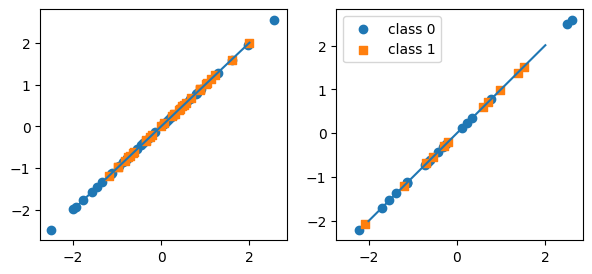

In [22]:
weights, bias = perceptron.weights, perceptron.bias

x_min = -2
y_min = (-(weights[0] * x_min) - bias[0])

x_max = 2
y_max = (-(weights[0] * x_max) - bias[0])

figure, axis = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

# plot the decision boundary
axis[0].plot([x_min, x_max], [y_min, y_max])
axis[1].plot([x_min, x_max], [y_min, y_max])

axis[0].scatter(X_train[y_train==0], X_train[y_train==0], label='class 0', marker='o')
axis[0].scatter(X_train[y_train==1], X_train[y_train==1], label='class 1', marker='s')

axis[1].scatter(X_test[y_test==0], X_test[y_test==0], label='class 0', marker='o')
axis[1].scatter(X_test[y_test==1], X_test[y_test==1], label='class 1', marker='s')

axis[1].legend(loc='upper left')
plt.show()
